# Importing spaCy and performing webscrapping and getting ner's

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
sns.set_context('paper')

import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

In [2]:
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Current google-chrome version is 83.0.4103
[WDM] - Get LATEST driver version for 83.0.4103
[WDM] - There is no [win32] chromedriver for browser 83.0.4103 in cache
[WDM] - Get LATEST driver version for 83.0.4103
[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/83.0.4103.39/chromedriver_win32.zip


[WDM] - Driver has been saved in cache [C:\Users\shiva\.wdm\drivers\chromedriver\win32\83.0.4103.39]


In [3]:
driver.get("https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news")

In [12]:
content = driver.page_source
soup = BeautifulSoup(content)
all_paras = soup.find_all('p')

In [13]:
text = ''
for p in all_paras:
    text += p.get_text()

In [14]:
print(text)

AdvertisementSupported byBy Adam Goldman and Michael S. SchmidtWASHINGTON — Peter Strzok, the F.B.I. senior counterintelligence agent who disparaged President Trump in inflammatory text messages and helped oversee the Hillary Clinton email and Russia investigations, has been fired for violating bureau policies, Mr. Strzok’s lawyer said Monday.Mr. Trump and his allies seized on the texts — exchanged during the 2016 campaign with a former F.B.I. lawyer, Lisa Page — in assailing the Russia investigation as an illegitimate “witch hunt.” Mr. Strzok, who rose over 20 years at the F.B.I. to become one of its most experienced counterintelligence agents, was a key figure in the early months of the inquiry.Along with writing the texts, Mr. Strzok was accused of sending a highly sensitive search warrant to his personal email account.AdvertisementThe F.B.I. had been under immense political pressure by Mr. Trump to dismiss Mr. Strzok, who was removed last summer from the staff of the special counse

In [15]:
document = nlp(text)
displacy.render(document, style = "ent",jupyter = True)

# Getting named entities recognition

In [16]:
entities=[(str(i), i.label_) for i in document.ents]
print(entities)
entities_df = pd.DataFrame(entities, columns =['Entity', 'Label'])
entities_df.head()

[('Adam Goldman', 'PERSON'), ('Michael S. SchmidtWASHINGTON', 'PERSON'), ('Peter Strzok', 'PERSON'), ('F.B.I.', 'ORG'), ('Trump', 'PERSON'), ('Hillary Clinton', 'PERSON'), ('Russia', 'GPE'), ('Strzok', 'PERSON'), ('Monday', 'DATE'), ('Trump', 'PERSON'), ('2016', 'DATE'), ('F.B.I.', 'ORG'), ('Lisa Page', 'PERSON'), ('Russia', 'GPE'), ('Strzok', 'PERSON'), ('over 20 years', 'DATE'), ('F.B.I.', 'ORG'), ('the early months', 'DATE'), ('Strzok', 'PERSON'), ('AdvertisementThe F.B.I.', 'ORG'), ('Trump', 'PERSON'), ('Strzok', 'PERSON'), ('last summer', 'DATE'), ('Robert S. Mueller III', 'PERSON'), ('Strzok', 'PERSON'), ('Monday', 'DATE'), ('Trump', 'PERSON'), ('June', 'DATE'), ('Strzok', 'PERSON'), ('F.B.I.', 'ORG'), ('Hillary Clinton', 'PERSON'), ('2016', 'DATE'), ('Strzok', 'PERSON'), ('Office of Professional Responsibility', 'ORG'), ('Strzok', 'PERSON'), ('60 days', 'DATE'), ('Strzok', 'PERSON'), ('House', 'ORG'), ('July', 'DATE'), ('Strzok', 'PERSON'), ('F.B.I.', 'ORG'), ('David Bowdich', '

,Entity,Label
0,Adam Goldman,PERSON
1,Michael S. SchmidtWASHINGTON,PERSON
2,Peter Strzok,PERSON
3,F.B.I.,ORG
4,Trump,PERSON


# counts of ner's

In [17]:
counts = entities_df['Label'].value_counts()
counts

PERSON      70
ORG         33
DATE        23
GPE          9
CARDINAL     3
NORP         2
ORDINAL      1
Name: Label, dtype: int64

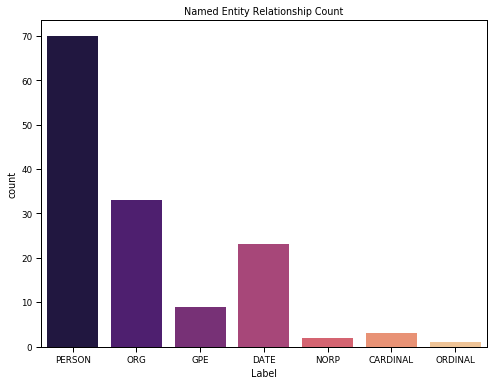

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Label', data = entities_df, palette = 'magma')
plt.title('Named Entity Relationship Count')
plt.show()